# 3 Drell-Yan Event Generator with VEGAS
Consider the Drell-Yan production process at an electron-positron collider, in which an electron and positron
collide to produce a virtual photon or a Z boson that then decays into a muon-antimuon pair,
$e^+e^- \rightarrow Z/\gamma \rightarrow \mu^+\mu^-$. As described in lecture and in Ref. [5], the differential cross section for center-of-mass energy $E_{CM} = \sqrt{\hat{s}}$ and scattering angle $\theta$ is given by

$$\frac{d\sigma}{d\Omega}(\hat{s}, \cos \theta) = \frac{\alpha^2}{4\hat{s}} \left[ A_0(\hat{s})(1 + \cos^2\theta) + A_1(\hat{s}) \cos \theta \right],$$

Where $A_0$ and $A_1$ are given by

$$
A_0(\hat{s}) = Q_e^2 - 2Q_eV_\mu V_e \chi_1(\hat{s}) + (A_\mu^2 + V_\mu^2)(A_e^2 + V_e^2) \chi_2(\hat{s}),
$$

$$
A_1(\hat{s}) = -4Q_eA_\mu A_e \chi_1(\hat{s}) + 8A_\mu V_\mu A_e V_e \chi_2(\hat{s}),
$$

and the $\chi_1$ and $\chi_2$ are given by

$$
\chi_1(\hat{s}) = \frac{\kappa\hat{s}(\hat{s} - M_Z^2)}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\chi_2(\hat{s}) = \frac{\kappa^2 \hat{s}^2}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\kappa = \frac{\sqrt{2}G_F M_Z^2}{4\pi\alpha}.
$$

Useful constants are given in the tables below.

| Fermions        | $Q_f$ | $V_f$                                | $A_f$ |
|-----------------|-------|--------------------------------------|-------|
| $u, c, t$       | $+\frac{2}{3}$ | $\left(+\frac{1}{2} - \frac{4}{3}\sin^2\theta_W\right)$ | $+\frac{1}{2}$ |
| $d, s, b$       | $-\frac{1}{3}$ | $\left(-\frac{1}{2} - \frac{2}{3}\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |
| $\nu_e, \nu_\mu, \nu_\tau$ | $0$ | $\frac{1}{2}$ | $+\frac{1}{2}$ |
| $e, \mu, \tau$  | $-1$ | $\left(-\frac{1}{2} + 2\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |

| Variable               | Symbol           | Value                                          |
|------------------------|------------------|------------------------------------------------|
| Conversion factor      | GeV<sup>-2</sup> ↔ pb | 3.894 × 10<sup>8</sup> pb = 1 GeV<sup>-2</sup> |
| Z boson mass           | M<sub>Z</sub>            | 91.188 GeV                                     |
| Z boson width          | Γ<sub>Z</sub>            | 2.4414 GeV                                     |
| QED running coupling   | α                | 1/132.507                                      |
| Fermi constant         | G<sub>F</sub>            | 1.16639 × 10<sup>-5</sup> GeV<sup>-2</sup>    |
| Weinberg angle         | sin<sup>2</sup> θ<sub>W</sub> | 0.222246                                     |



In [1]:
# Import the required libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# comment to add change

In [2]:
# Define constants

# Conversion factor from GeV^-2 to picobarns (pb)
cf = 3.894e+8

# Mass of the Z boson in units of GeV
Mz = 91.188

# Total decay width (Γ_Z) of the Z boson in GeV
Gz = 2.4414

# The inverse of the QED (quantum electrodynamics) running coupling constant at the Z boson mass scale
alpha = 1/(132.507)

# Fermi coupling constant (G_F) in GeV^-2
Gf = 1.16639e-5

# Weinberg angle (sin^2(theta_W)), a parameter of the electroweak theory
Wtheta = 0.222246

# Kappa (κ) is a dimensionless parameter related to the weak mixing angle and the ratio of the W and Z boson masses
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

# Define fermions

# Electric charge of the electron
Qe = -1

# The vector coupling constant Vmu for muon
Vmu = -0.5 + 2*(Wtheta)

# The vector coupling constant Ve for electron
Ve = -0.5 + 2*(Wtheta)

# The axial-vector coupling constant Amu for muon
Amu = -0.5

# The axial-vector coupling constant Ae for electron
Ae = -0.5

# Define ranges

XMIN = 10 # Minimum center-of-mass energy (E_CM) in GeV
XMAX = 200 # Maximum " "
YMIN = -1 # Minimum value of the cosine of the scattering angle theta (cos θ) 
YMAX = 1 # Maximum " "

In [3]:
def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# option to calculate the cross section using the standard model, where the Z boson is present, or with QED where there is no Z boson
def cross_section(E,cost, method='SM'):
    s = np.array(E**2)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    if method=='SM':
        return const*(A0(s)*(1+cost**2) + A1(s)*cost)*cf # multiply by the conversion factor to convert to pb
    elif method=='QED':
        return const*(1+cost**2)*cf # multiply by the conversion factor to convert to pb

In [4]:
cross_section(XMIN,1)

109.90384595557816

In [5]:
cross_section(Mz,1)

262.5864429837076

In [6]:
cross_section(40,1)

5.778208617525939

In [7]:
E=np.linspace(XMIN,XMAX,1000)
cost=np.linspace(-1,1,1000)

# To find max value we initially did a nested for loop
# fvals=[]
# for si in s:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# Then we tried looking at the smallest energies
# s2=np.linspace(100,500,1000)
# fvals=[]
# for si in s2:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# But this maximum value was way below the maximum value for the nested for loop

# So we tried to find the maximum value around the resonance point at the Mass of the Z boson (squared)
fvals=[]
for costi in cost:
    fvals.append(cross_section(Mz,costi,method='SM'))
F_VAL_MAX = np.max(fvals)
FMAX2 = np.max(cross_section(E,1,method='QED'))

In [8]:
print('maximum for the Standard Model is: ' +str(round(F_VAL_MAX,3))+'pb')

maximum for the Standard Model is: 262.586pb


In [9]:
print('maximum for the QED is: ' +str(round(FMAX2,3))+'pb')

maximum for the QED is: 110.889pb


## Acceptance-rejection Method
Now, we define the standard acceptance-rejection method.

In [10]:
def brute_force(nPoints, seed=42, method='SM'):
    # Initialize error counters and variables
    err=0
    # Set F_MAX based on the specified method
    if method == 'SM':
        F_MAX = F_VAL_MAX  # maximum value for method SM
    elif method == 'QED':
        F_MAX = FMAX2  # max value for the QED method
    errs = 0  # Counter for the number of times f_val exceeds F_MAX
    nFunctionEval = 0  # Counter for the number of function evaluations
    yy1_rej_method = []  # List to store accepted yy1 values
    yy2_rej_method = []  # List to store accepted yy2 values
    maxWeightEncounteredRej = -1.0e20  # Track the maximum weight (function value) encountered

    # Initialize a random number generator with an optional seed for reproducibility
    generator = np.random.RandomState(seed=seed)
    
    # Keep generating and evaluating points until enough have been accepted
    while len(yy1_rej_method) < nPoints:
        # Generate three random numbers
        rr = generator.uniform(size=3)
        # Calculate trial points within the specified domain using the first two random numbers
        yy1, yy2 = XMIN + rr[0] * (XMAX - XMIN), YMIN + rr[1] * (YMAX - YMIN)
        nFunctionEval += 1  # Increment the function evaluation counter

        # Evaluate the function (e.g., cross section) at the trial point
        f_val = cross_section(yy1, yy2, method=method)
        # Update maxWeightEncounteredRej if the current function value is the highest seen
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val

        # If the function value exceeds the maximum allowed, exit the program
        if f_val > F_MAX:
            errs += 1
            print(f" f_val={f_val} exceeds F_VAL_MAX={F_MAX}, program will now exit. Error number {errs}")
            exit(99)

        # Acceptance condition: accept the trial point if this condition is true
        if (f_val / F_MAX) > rr[2]:
            yy1_rej_method.append(yy1)
            yy2_rej_method.append(yy2)

    # Return a dictionary with the accepted points, the number of function evaluations, and the highest function value encountered
    return {
        "yy1": yy1_rej_method,
        "yy2": yy2_rej_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncounteredRej
    }

    Brute Force Monte Carlo Simulation(nPoints, method='SM', seed=42)

    Initialize variables for error tracking and maximum function value
    Set F_MAX based on method ('SM' or 'QED')

    Initialize empty lists for accepted (yy1, yy2) points
    Initialize maxWeightEncountered to a very low value
    Initialize random number generator with seed (necessary when parameter tuning)

    While the number of accepted points is less than nPoints
        Generate three random numbers (rr)
        Calculate trial points (yy1, yy2) within specified domain using rr

        Evaluate function (cross_section) at (yy1, yy2)
        Update maxWeightEncountered if current value is higher

        If function value exceeds F_MAX
            Increment error counter and print error message
            Exit program

        If function value divided by F_MAX is greater than rr[2]
            Accept the trial point and add to lists (yy1_rej_method, yy2_rej_method)

    Return accepted points, number of function evaluations, and maxWeightEncountered

## Vegas Method

In [13]:
def setup_intervals(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=42, method='SM'):
    """
    Input:
        NN: Number of intervals in [XMIN, XMAX] or [YMIN, YMAX]
        KK: function evaluations per iteration
        nIterations: number of iterations
        alpha_damp: damping parameter in the Vegas algorithm
    Return:
        Intervals specified by xLow, yLow: each is a 1D numpy array of size NN+1, with
        xLow[0] = 0, xLow[NN] = ym; yLow[0] = 0, yLow[NN] = ym
    """

    # intitial intervals: uniform intervals between XMIN/YMIN and XMAX/YMAX
    xLow = XMIN + (XMAX - XMIN) / NN * np.arange(NN + 1)
    delx = np.ones(NN) * (XMAX - XMIN) / NN
    px = np.ones(NN) / (XMAX - XMIN)  # probability density in each interval
    yLow = YMIN + (YMAX - YMIN) / NN * np.arange(NN + 1)  # YMIN + (YMAX) / NN * np.arange(NN + 1) 
    dely = np.ones(NN) * (YMAX - YMIN) / NN
    py = np.ones(NN) / (YMAX - YMIN)

    generator = np.random.RandomState(seed=seed)
    for _ in range(nIterations):
        ixLow = generator.randint(0, NN, size=KK)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform(size=KK)
        iyLow = generator.randint(0, NN, size=KK)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform(size=KK)
        ff = cross_section(xx, yy,method=method)
        f2barx = np.array(
            [sum((ff[ixLow == i] / py[iyLow[ixLow == i]]) ** 2) for i in range(NN)]
        )
        fbarx = np.sqrt(f2barx)
        f2bary = np.array(
            [sum((ff[iyLow == i] / px[ixLow[iyLow == i]]) ** 2) for i in range(NN)]
        )
        fbary = np.sqrt(f2bary)
        fbardelxSum = np.sum(fbarx * delx)
        fbardelySum = np.sum(fbary * dely)
        logArgx = fbarx * delx / fbardelxSum
        logArgy = fbary * dely / fbardelySum
        mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
        mmx = mmx.astype(int)
        mmx = np.where(mmx > 1, mmx, 1)
        mmy = KK * pow((logArgy - 1) / np.log(logArgy), alpha_damp)
        mmy = mmy.astype(int)
        mmy = np.where(mmy > 1, mmy, 1)
        xLowNew = [xLow[i] + np.arange(mmx[i]) * delx[i] / mmx[i] for i in range(NN)]
        xLowNew = np.concatenate(xLowNew, axis=0)
        yLowNew = [yLow[i] + np.arange(mmy[i]) * dely[i] / mmy[i] for i in range(NN)]
        yLowNew = np.concatenate(yLowNew, axis=0)
        nCombx = int(len(xLowNew) / NN)
        nComby = int(len(yLowNew) / NN)
        i = np.arange(NN)
        xLow[:-1] = xLowNew[i * nCombx]
        yLow[:-1] = yLowNew[i * nComby]
        delx = np.diff(xLow)
        dely = np.diff(yLow)
        px = 1.0 / delx / NN
        py = 1.0 / dely / NN

    return xLow, yLow, delx, dely

In [14]:
def vegas(
    nPoints,
    vegasRatioFactor,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=42,
    method='SM'
):
    errs=0
    if method=='SM':
        F_MAX=F_VAL_MAX
    elif method=='QED':
        F_MAX=FMAX2
    xLow, yLow, delx, dely = setup_intervals(NN, KK, nIterations, alpha_damp, seed,method=method)
    # vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]  # we wanted to understand where the index NN-2 came from
    # vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * np.max(delx) * np.max(dely)  # in lab17 gaussian example, delx[NN-2] is the fourth largest delx
    vegasRatioMax = vegasRatioFactor * F_MAX * NN * NN * np.min(delx) * np.min(dely) # in the original code, delx[NN-2] is the smalles delx (where the maximum occurs)
    nFunctionEval = 0
    yy1_vegas_method = []
    yy2_vegas_method = []
    yy1_vrho_method = []
    yy2_vrho_method = []
    maxWeightEncountered = -1.0e20

    generator = np.random.RandomState(seed=seed)
    while len(yy1_vegas_method) < nPoints:
        ixLow = generator.randint(0, NN)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform()
        iyLow = generator.randint(0, NN)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform()
        yy1_vrho_method.append(xx)
        yy2_vrho_method.append(yy)
        nFunctionEval += 1
        f_val = cross_section(xx, yy, method=method)
        ratio = f_val * NN * NN * delx[ixLow] * dely[iyLow]
        if ratio > maxWeightEncountered:
            maxWeightEncountered = ratio
        if ratio > vegasRatioMax:
            errs+=1
            print(
                f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={yy} program will now exit. Error number {errs}"
            )
            exit(99)
        if ratio / vegasRatioMax > generator.uniform():
            yy1_vegas_method.append(xx)
            yy2_vegas_method.append(yy)

    return {
        "yy1vrho": yy1_vrho_method,
        "yy2vrho": yy2_vrho_method,
        "yy1vegas": yy1_vegas_method,
        "yy2vegas": yy2_vegas_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncountered,
        "vegasRatioMax": vegasRatioMax,
    }

This lego plot will show the function we are trying to integrate.

In [15]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title, scale='linear'):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure(figsize=(9,9))  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    histt = np.transpose(hist) # need to transpose the array for it to take the organization we want when we flatten it
    dz = histt.flatten()
    dzlog = [np.log10(dzi) if dzi>=1 else 0 for dzi in dz]

    cmap = mpl.cm.jet
    #cmap = mpl.colormaps["jet"]
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]


    if scale=='linear':
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    elif scale=='log':
        ax.bar3d(xpos, ypos, zpos, dx, dy, dzlog, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel, fontsize=18)
    plt.ylabel(yLabel, fontsize=18)
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    plt.show()

In [16]:
def _get_colors(hist):
    cmap = mpl.cm.jet
    max_height = np.max(hist)
    min_height = np.min(hist)
    rgba = [cmap((k - min_height) / max_height) for k in hist]
    return rgba

def lego_plot2d(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title, scale='linear'):
    x = np.array(xAmplitudes)
    y = np.array(yAmplitudes)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    xhist, xedges = np.histogram(x, bins=nBins)
    xpos = (xedges[:-1] + xedges[1:]) / 2
    if scale=='linear':
        axes[0].bar(xpos, xhist, width=np.diff(xedges), color=_get_colors(xhist), alpha=0.7)
    elif scale=='log':
        axes[0].bar(xpos, np.log10(xhist), width=np.diff(xedges), color=_get_colors(xhist), alpha=0.7)
    
    yhist, yedges = np.histogram(y, bins=nBins)
    ypos = (yedges[:-1] + yedges[1:]) / 2
    axes[1].bar(ypos, yhist, width=np.diff(yedges), color=_get_colors(yhist), alpha=0.7)

    axes[0].set_xlabel(xLabel, fontsize=18)
    # axes[0].set_ylabel('Frequency')
    # axes[0].set_title(title + ' - E_{cm}')

    axes[1].set_xlabel(yLabel, fontsize=18)
    # axes[1].set_ylabel('Frequency')
    # axes[1].set_title(title + ' - Y Amplitudes')

    plt.tight_layout()
    plt.show()

Run both algorithms and compare results

In [17]:
def plot_results(
    nPoints,
    vegasRatioFactor,
    nBins=50,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=42,
    method='SM',
    scale='linear',
    histtype='3d'
):
    bf = brute_force(nPoints, seed,method=method)
    vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method=method)
    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    elif histtype=='2d':
        lego_plot2d(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    plt.show()

    # Vegas method
    titleVrho = r"Vegas Method $p(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    plt.show()

    titleVegas = r"Vegas Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
    print(
        f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
    )

In [18]:
def plot_results2(
    nPoints,
    vegasRatioFactor,
    bf,
    vg,
    nBins=50,
    scale='linear',
    histtype='3d'
):

    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    elif histtype=='2d':
        lego_plot2d(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    plt.show()

    # Vegas method
    titleVrho = r"Vegas Method $p(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    plt.show()

    titleVegas = r"Vegas Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
    print(
        f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
    )

First run the brute force and the vegas methods:

In [19]:
nPoints=10000
vegasRatioFactor=6
nBins=50
NN=100
KK=2000
nIterations=4000
alpha_damp=1.5
seed=42
method='SM'

# bf = brute_force(nPoints, seed,method=method)
# vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method=method)

In [20]:
bf = brute_force(nPoints, seed,method=method)

 f_val=263.45164134919463 exceeds F_VAL_MAX=262.5864429837076, program will now exit. Error number 1
 f_val=263.5297115795704 exceeds F_VAL_MAX=262.5864429837076, program will now exit. Error number 2
 f_val=262.6242030661449 exceeds F_VAL_MAX=262.5864429837076, program will now exit. Error number 3


In [21]:
vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method=method)

ratio=17455.54512994446 exceeds vegasRatioMax=15760.045585374528, yy=0.9915734509648422 program will now exit. Error number 1
ratio=17838.3682732025 exceeds vegasRatioMax=15760.045585374528, yy=0.9988253023487884 program will now exit. Error number 2


First plot in 2D for quick good visualization

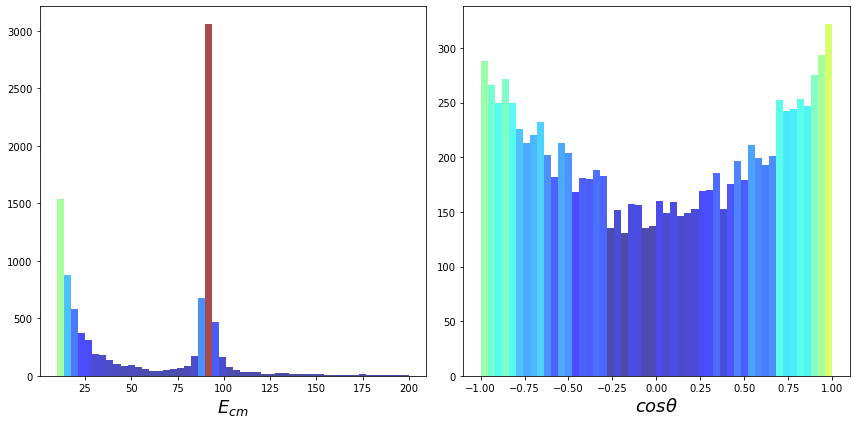

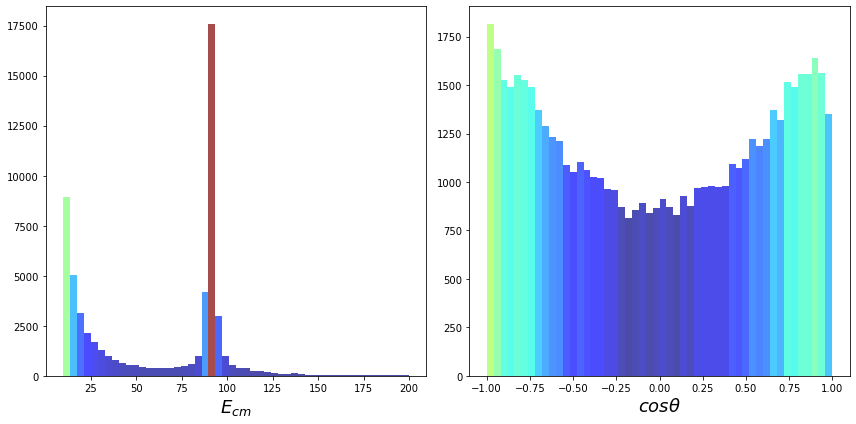

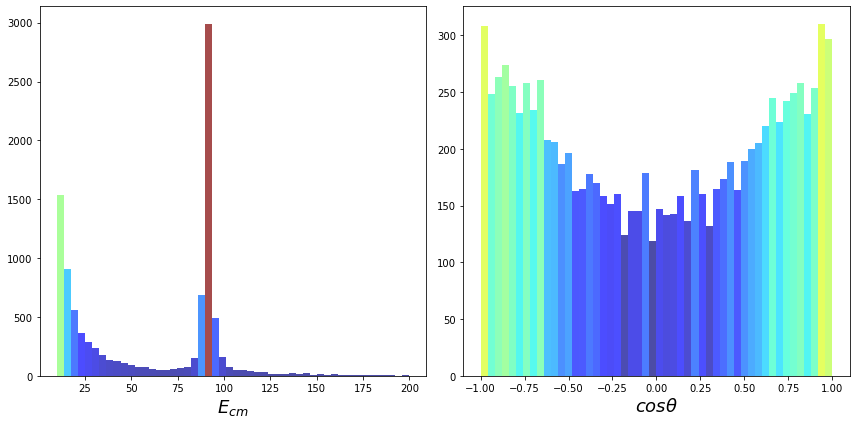

Acceptance-rejection method nPoints=100000, nFunctionEval=377693, maxWeightEncounteredRej=263.5297115795704, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=59156, maxWeightEncountered=17838.3682732025, vegasRatioMax=15760.045585374528, vegasRatioFactor=0.1


In [22]:
plot_results2(100_000, 0.1,bf,vg,histtype='2d')

We van also plot the Energy plot in log scale

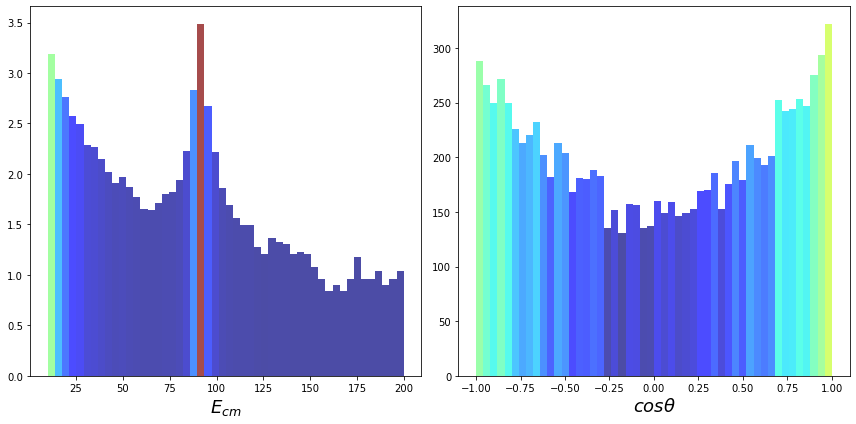

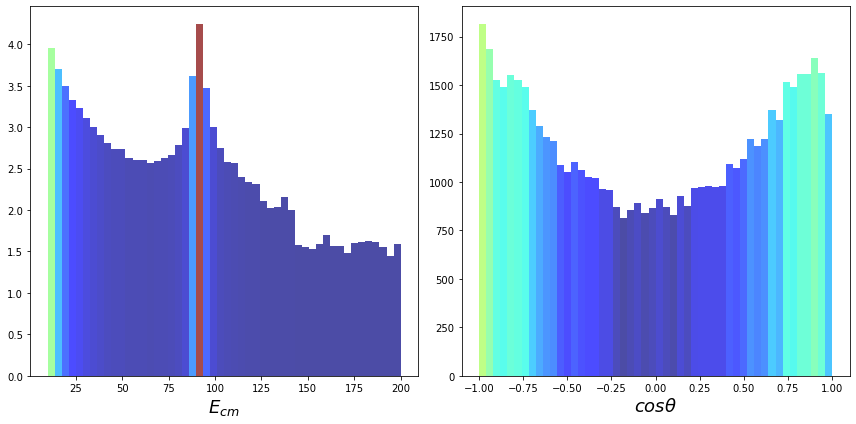

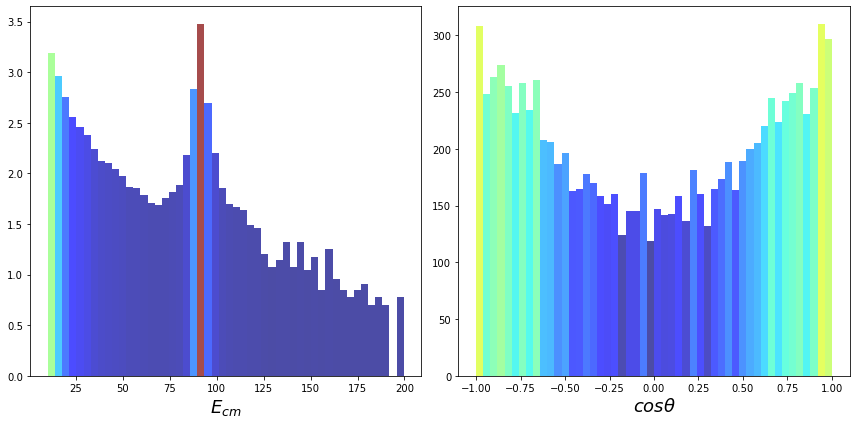

Acceptance-rejection method nPoints=100000, nFunctionEval=377693, maxWeightEncounteredRej=263.5297115795704, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=59156, maxWeightEncountered=17838.3682732025, vegasRatioMax=15760.045585374528, vegasRatioFactor=0.1


In [23]:
plot_results2(100_000, 0.1,bf,vg,scale='log',histtype='2d')

Now what we'va all been waiting for:

In 3D

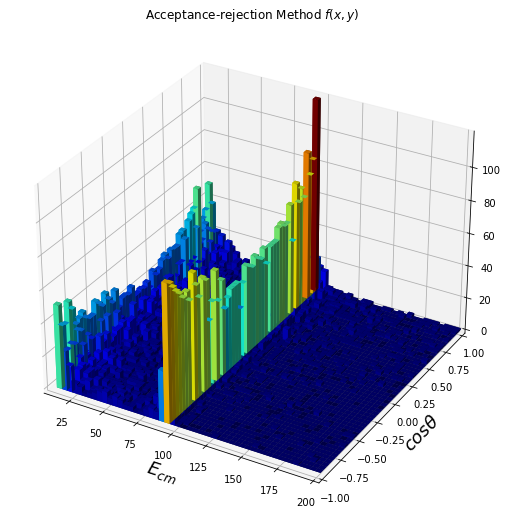

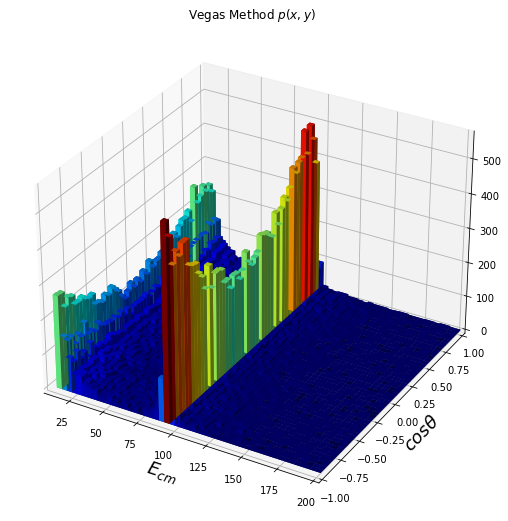

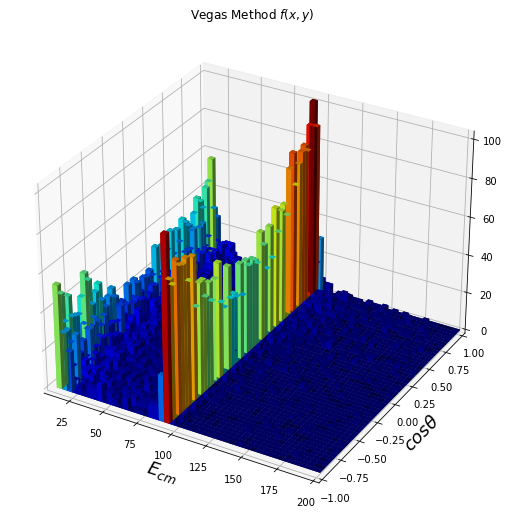

Acceptance-rejection method nPoints=100000, nFunctionEval=377693, maxWeightEncounteredRej=263.5297115795704, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=59156, maxWeightEncountered=17838.3682732025, vegasRatioMax=15760.045585374528, vegasRatioFactor=0.1


In [24]:
plot_results2(100_000, 0.1, bf,vg)

And in log scale

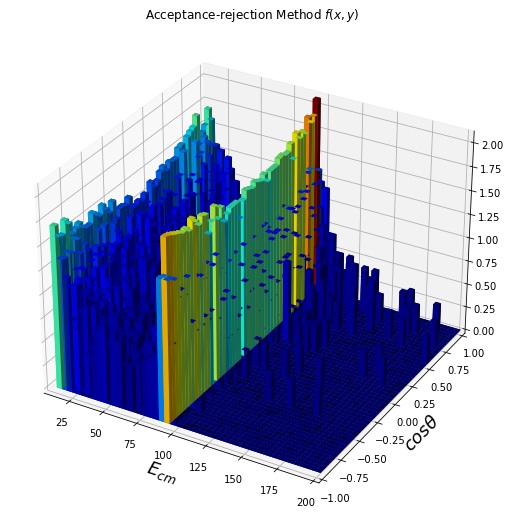

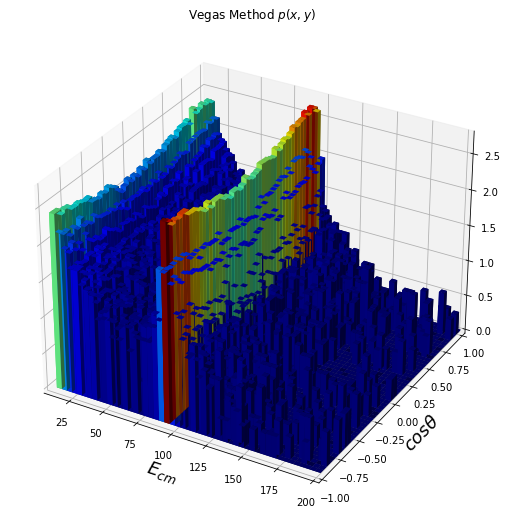

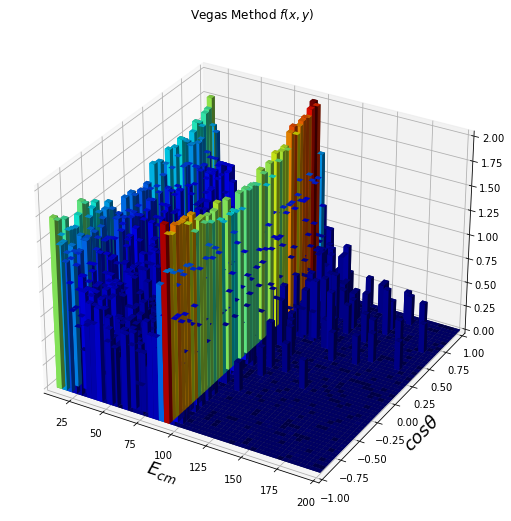

Acceptance-rejection method nPoints=100000, nFunctionEval=377693, maxWeightEncounteredRej=263.5297115795704, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=59156, maxWeightEncountered=17838.3682732025, vegasRatioMax=15760.045585374528, vegasRatioFactor=0.1


In [25]:
plot_results2(100_000, 0.1,bf,vg,scale='log')

In [26]:
def bindist(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel):
    x = np.array(xAmplitudes)
    y = np.array(yAmplitudes)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    xhist, xedges = np.histogram(x, bins=nBins)
    xpos = (xedges[:-1] + xedges[1:]) / 2
    # normalized cummulative hist
    xhist = np.cumsum(xhist)
    xhist = xhist/xhist[-1]
    axes[0].plot(xpos, xhist, linewidth=4, color='b')
    # vertical line at x=Mz
    axes[0].axvline(x=Mz, color='k', linestyle='--', label='Z boson mass', linewidth=2)

    
    yhist, yedges = np.histogram(y, bins=nBins)
    ypos = (yedges[:-1] + yedges[1:]) / 2
    # normalized cummulative hist
    yhist = np.cumsum(yhist)
    yhist = yhist/yhist[-1]
    axes[1].plot(ypos, yhist, linewidth=4, color='r')

    axes[0].set_xlabel(xLabel, fontsize=18)
    axes[0].set_ylabel('Cumulative Bins Distribution')
    axes[0].legend(fontsize=12)
    axes[1].set_xlabel(yLabel, fontsize=18)
    axes[1].set_ylabel('Bins Distribution')

    plt.tight_layout()
    plt.show()

In [27]:
def plot_bindist(method,
    nBins=50):

    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    bindist(method["yy1"], method["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$")
    plt.show()


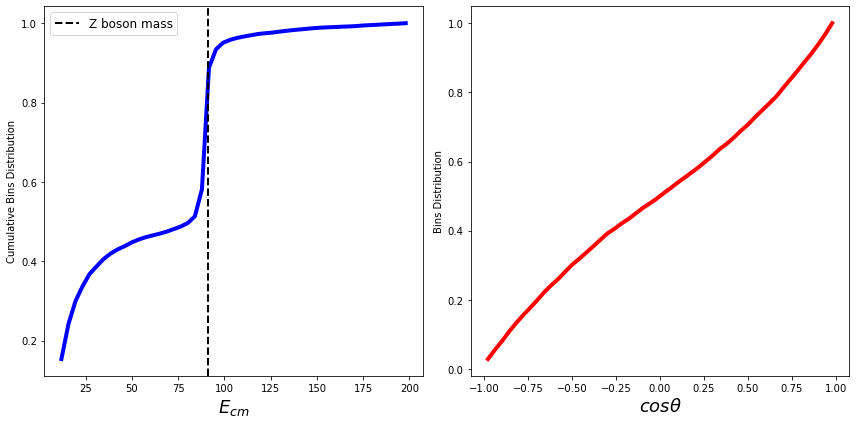

In [28]:
plot_bindist(bf)

# Parameter tuning

In [27]:
def plot_results3(
    vg,
    nBins=50):
    # Vegas method
    titleVegas = r"Vegas Method $f(x,y)$"
    lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas)
    plt.show()

In [28]:
# Multiple changes

nPoints=[1000,10000,100000]
# nPoints=[1000,10000]
nBins=[15,50,150]
# nBins=[15,50]
alpha_damp=[1.5,2.5]

vegasRatioFactor=6
NN=100
KK=2000
nIterations=4000
seed=42
method='SM'

for nP in nPoints:
    for ad in alpha_damp:
        vg = vegas(nP, vegasRatioFactor, NN, KK, nIterations, ad, seed,method=method)
        for nB in nBins:
            print(f"nPoints={nP}, nBins={nB}, alpha_damp={ad}")
            plot_results3(vg, nBins=nB)
            print('-----------------------------------')
            print('-----------------------------------')
            print('-----------------------------------')

KeyboardInterrupt: 

nPoints=10000, nBins=50, alpha_damp=0.1


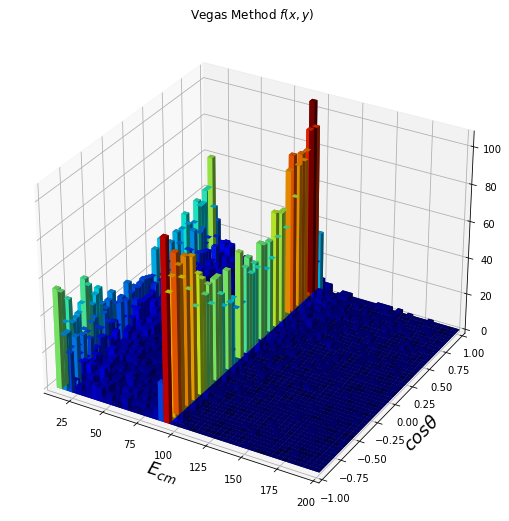

-----------------------------------
nPoints=10000, nBins=50, alpha_damp=0.5


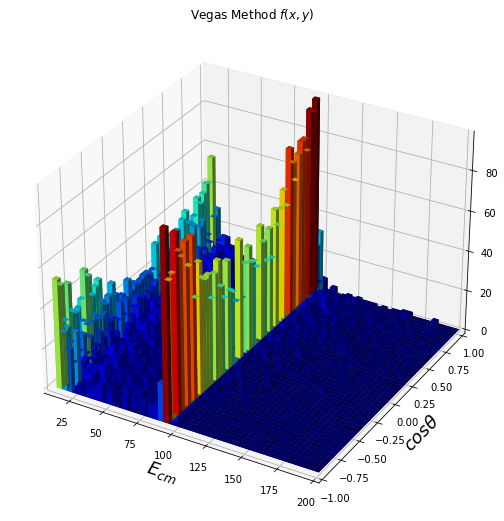

-----------------------------------
ratio=20994.63962784448 exceeds vegasRatioMax=16013.731878353588, yy=0.990834488014301 program will now exit. Error number 1
ratio=21498.24160243272 exceeds vegasRatioMax=16013.731878353588, yy=0.998722287693713 program will now exit. Error number 2
nPoints=10000, nBins=50, alpha_damp=1


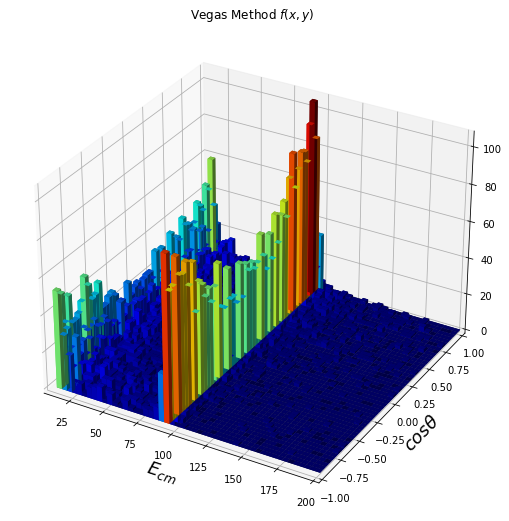

-----------------------------------
ratio=3414.1681529996786 exceeds vegasRatioMax=988.4093938367563, yy=0.4330995584920402 program will now exit. Error number 1
ratio=2512.436767017826 exceeds vegasRatioMax=988.4093938367563, yy=-0.8462333688120215 program will now exit. Error number 2
ratio=3320.684862646499 exceeds vegasRatioMax=988.4093938367563, yy=0.5843806208294853 program will now exit. Error number 3
ratio=1934.3642722837176 exceeds vegasRatioMax=988.4093938367563, yy=0.6285774206171857 program will now exit. Error number 4
ratio=1239.1161299709604 exceeds vegasRatioMax=988.4093938367563, yy=0.23268200821206447 program will now exit. Error number 5
ratio=1240.3977060699629 exceeds vegasRatioMax=988.4093938367563, yy=0.7899327858542745 program will now exit. Error number 6
ratio=9351.710807421196 exceeds vegasRatioMax=988.4093938367563, yy=-0.8197448547836246 program will now exit. Error number 7
ratio=4222.075844761426 exceeds vegasRatioMax=988.4093938367563, yy=-0.52648240164

ratio=1136.7662664927432 exceeds vegasRatioMax=988.4093938367563, yy=0.6761008875749783 program will now exit. Error number 917
ratio=4038.5565989727847 exceeds vegasRatioMax=988.4093938367563, yy=0.1949420587457663 program will now exit. Error number 918
ratio=2349.813880741929 exceeds vegasRatioMax=988.4093938367563, yy=-0.6301795956682492 program will now exit. Error number 919
ratio=1104.1198092807842 exceeds vegasRatioMax=988.4093938367563, yy=-0.9158744800280391 program will now exit. Error number 920
ratio=2741.399617989059 exceeds vegasRatioMax=988.4093938367563, yy=0.14245574602960917 program will now exit. Error number 921
ratio=1797.5781456792486 exceeds vegasRatioMax=988.4093938367563, yy=-0.4217924002683814 program will now exit. Error number 922
ratio=1908.2151641663854 exceeds vegasRatioMax=988.4093938367563, yy=0.6694288309948037 program will now exit. Error number 923
ratio=1068.1472463807797 exceeds vegasRatioMax=988.4093938367563, yy=-0.6035337236503248 program will 

ratio=2104.9892866511514 exceeds vegasRatioMax=988.4093938367563, yy=0.881962127585235 program will now exit. Error number 1623
ratio=2082.9407722298683 exceeds vegasRatioMax=988.4093938367563, yy=0.2820981996632326 program will now exit. Error number 1624
ratio=1960.8788225528685 exceeds vegasRatioMax=988.4093938367563, yy=-0.9776263425289475 program will now exit. Error number 1625
ratio=4693.902254722092 exceeds vegasRatioMax=988.4093938367563, yy=0.8642430951898431 program will now exit. Error number 1626
ratio=2922.716472057296 exceeds vegasRatioMax=988.4093938367563, yy=0.6174187213847081 program will now exit. Error number 1627
ratio=2339.979109177088 exceeds vegasRatioMax=988.4093938367563, yy=0.3418407656420506 program will now exit. Error number 1628
ratio=2550.9326768167475 exceeds vegasRatioMax=988.4093938367563, yy=0.8652041020824227 program will now exit. Error number 1629
ratio=1649.5842184531195 exceeds vegasRatioMax=988.4093938367563, yy=0.7671797202882679 program will

ratio=4305.999735780546 exceeds vegasRatioMax=988.4093938367563, yy=0.8052489643525074 program will now exit. Error number 2341
ratio=1015.3260556214956 exceeds vegasRatioMax=988.4093938367563, yy=-0.13790693839598095 program will now exit. Error number 2342
ratio=2385.001113622819 exceeds vegasRatioMax=988.4093938367563, yy=-0.5902925129770588 program will now exit. Error number 2343
ratio=1642.9491797151902 exceeds vegasRatioMax=988.4093938367563, yy=0.5209611715774644 program will now exit. Error number 2344
ratio=1418.8780084947532 exceeds vegasRatioMax=988.4093938367563, yy=0.6178128633249049 program will now exit. Error number 2345
ratio=4134.996968863399 exceeds vegasRatioMax=988.4093938367563, yy=-0.6078310059877078 program will now exit. Error number 2346
ratio=1502.6968108051638 exceeds vegasRatioMax=988.4093938367563, yy=-0.07569441853709852 program will now exit. Error number 2347
ratio=1861.8023236252461 exceeds vegasRatioMax=988.4093938367563, yy=0.7623807404673707 progra

ratio=1005.0390010649638 exceeds vegasRatioMax=988.4093938367563, yy=-0.5496984214567162 program will now exit. Error number 3373
ratio=1403.348500617966 exceeds vegasRatioMax=988.4093938367563, yy=0.5218458732770159 program will now exit. Error number 3374
ratio=1464.5259441368426 exceeds vegasRatioMax=988.4093938367563, yy=0.9441902371312995 program will now exit. Error number 3375
ratio=2205.7990784077156 exceeds vegasRatioMax=988.4093938367563, yy=-0.0550630155748508 program will now exit. Error number 3376
ratio=3613.3169426873924 exceeds vegasRatioMax=988.4093938367563, yy=-0.5828096798797705 program will now exit. Error number 3377
ratio=1513.114440296508 exceeds vegasRatioMax=988.4093938367563, yy=0.2669870593711704 program will now exit. Error number 3378
ratio=7757.136918445563 exceeds vegasRatioMax=988.4093938367563, yy=-0.3352706551517116 program will now exit. Error number 3379
ratio=3228.630713848992 exceeds vegasRatioMax=988.4093938367563, yy=-0.06416778536060297 program

ratio=5519.085365906312 exceeds vegasRatioMax=988.4093938367563, yy=-0.2829544269828251 program will now exit. Error number 3915
ratio=5734.115702343343 exceeds vegasRatioMax=988.4093938367563, yy=0.10373281271881596 program will now exit. Error number 3916
ratio=1272.10683251095 exceeds vegasRatioMax=988.4093938367563, yy=0.7897382530703932 program will now exit. Error number 3917
ratio=1115.160081453466 exceeds vegasRatioMax=988.4093938367563, yy=-0.8334625871655362 program will now exit. Error number 3918
ratio=3061.4910860529967 exceeds vegasRatioMax=988.4093938367563, yy=-0.8839308265354755 program will now exit. Error number 3919
ratio=5675.860610625962 exceeds vegasRatioMax=988.4093938367563, yy=-0.25247069947656536 program will now exit. Error number 3920
ratio=1246.2348015933449 exceeds vegasRatioMax=988.4093938367563, yy=0.49019312533795584 program will now exit. Error number 3921
ratio=4438.821878959162 exceeds vegasRatioMax=988.4093938367563, yy=-0.7159210377292244 program 

ratio=1233.5727549575558 exceeds vegasRatioMax=988.4093938367563, yy=-0.3391683898710353 program will now exit. Error number 4755
ratio=1258.291684767541 exceeds vegasRatioMax=988.4093938367563, yy=-0.8746499228759609 program will now exit. Error number 4756
ratio=1020.0877369698518 exceeds vegasRatioMax=988.4093938367563, yy=0.3828859447048286 program will now exit. Error number 4757
ratio=1031.4149094024335 exceeds vegasRatioMax=988.4093938367563, yy=0.08987624816505858 program will now exit. Error number 4758
ratio=2097.940217415092 exceeds vegasRatioMax=988.4093938367563, yy=-0.7218236920156069 program will now exit. Error number 4759
ratio=2695.4740606624896 exceeds vegasRatioMax=988.4093938367563, yy=0.272170608916776 program will now exit. Error number 4760
ratio=1596.577800556984 exceeds vegasRatioMax=988.4093938367563, yy=0.4641715088395898 program will now exit. Error number 4761
ratio=1181.4269693298322 exceeds vegasRatioMax=988.4093938367563, yy=-0.9579478318382797 program 

ratio=1773.3874643327395 exceeds vegasRatioMax=988.4093938367563, yy=0.3178774637804934 program will now exit. Error number 5789
ratio=1149.77518008647 exceeds vegasRatioMax=988.4093938367563, yy=0.5024740430016172 program will now exit. Error number 5790
ratio=6202.552004635796 exceeds vegasRatioMax=988.4093938367563, yy=-0.44019819528589776 program will now exit. Error number 5791
ratio=2066.840007724935 exceeds vegasRatioMax=988.4093938367563, yy=-0.16614969352703637 program will now exit. Error number 5792
ratio=1685.350025609316 exceeds vegasRatioMax=988.4093938367563, yy=0.7174366634136499 program will now exit. Error number 5793
ratio=2578.523689650363 exceeds vegasRatioMax=988.4093938367563, yy=0.038005881510270255 program will now exit. Error number 5794
ratio=1050.7638048636209 exceeds vegasRatioMax=988.4093938367563, yy=-0.6117005827862779 program will now exit. Error number 5795
ratio=1541.6670124475781 exceeds vegasRatioMax=988.4093938367563, yy=0.8447087055238026 program 

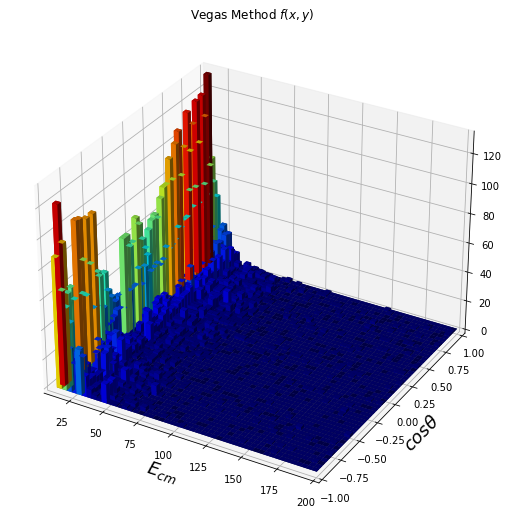

-----------------------------------
nPoints=10000, nBins=50, alpha_damp=10


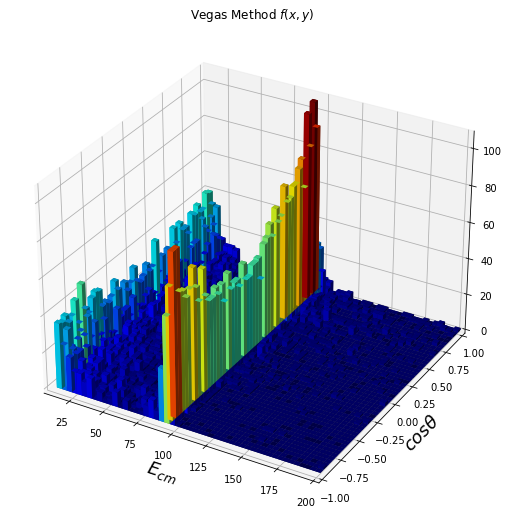

-----------------------------------


In [30]:
# Lets focus on only varying damping while keeping iterations, bins, npoints constant:

# Constants
nPoints = 10_000
nBins = 50
alpha_damp = [0.1, 0.5, 1, 5, 10]

# Other parameters
vegasRatioFactor = 6
NN = 100
KK = 2000
nIterations = 4000
seed = 42
method = 'SM'

# Loop only through alpha_damp list
for ad in alpha_damp:
    vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, ad, seed, method=method)
    print(f"nPoints={nPoints}, nBins={nBins}, alpha_damp={ad}")
    plot_results3(vg, nBins=nBins)
    print('-----------------------------------')


In [ ]:
# interesting behavior:

# alpha = 0.1 - no errors
# alpha = 0.5 - no errors
# alpha = 1 - 2 errors
# alpha = 5 - hundreds of errors
# alpha = 10 - no errors

ratio=17455.54512994446 exceeds vegasRatioMax=15760.045585374528, yy=0.9915734509648422 program will now exit. Error number 1
ratio=17838.3682732025 exceeds vegasRatioMax=15760.045585374528, yy=0.9988253023487884 program will now exit. Error number 2
nPoints=10000, nBins=2, alpha_damp=1.5


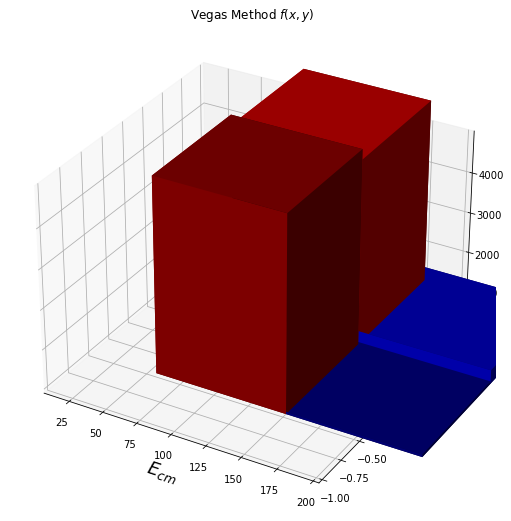

-----------------------------------
nPoints=10000, nBins=10, alpha_damp=1.5


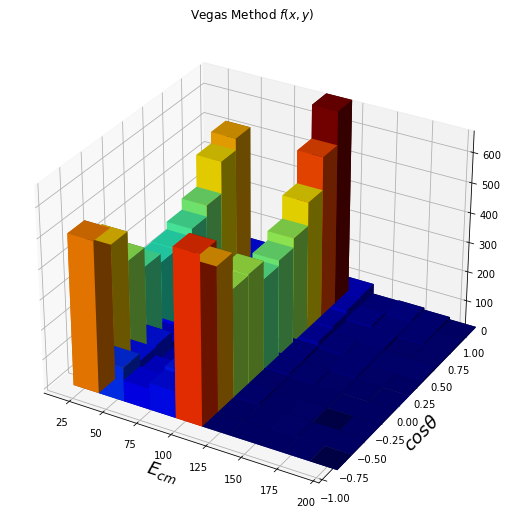

-----------------------------------
nPoints=10000, nBins=50, alpha_damp=1.5


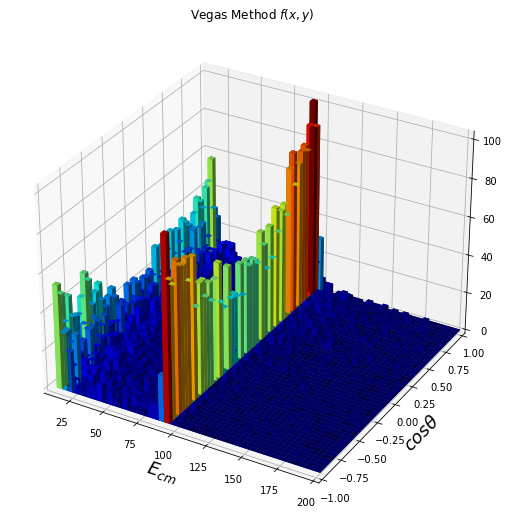

-----------------------------------
nPoints=10000, nBins=100, alpha_damp=1.5


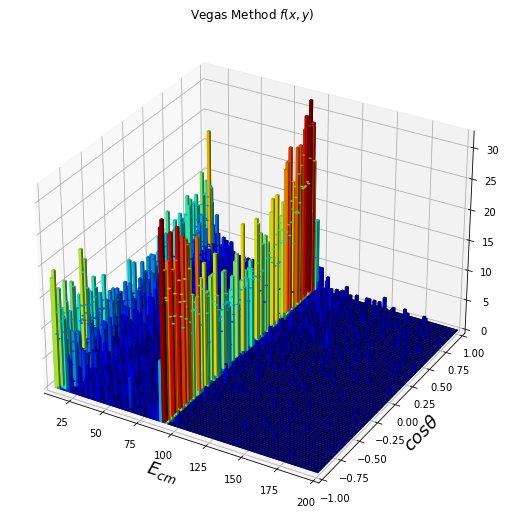

-----------------------------------
nPoints=10000, nBins=200, alpha_damp=1.5


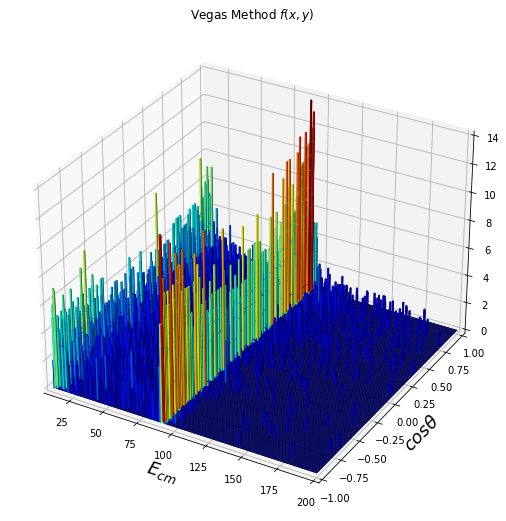

-----------------------------------


In [30]:
# Lets focus on only varying bins while keeping iterations, damping, npoints constant:

# Constants
nPoints = 10_000
nBins = [2,10,50,100,200]
alpha_damp = 1.5

# Other parameters
vegasRatioFactor = 6
NN = 100
KK = 2000
nIterations = 4000
seed = 42
method = 'SM'

vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed, method=method)

# Loop only through alpha_damp list
for nb in nBins:
    #vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed, method=method)
    print(f"nPoints={nPoints}, nBins={nb}, alpha_damp={alpha_damp}")
    plot_results3(vg, nBins=nb)
    print('-----------------------------------')

nPoints=10000, nIterations=0, nBins=50, alpha_damp=1.5
Vegas method nPoints=10000, nFunctionEval=2260351, maxWeightEncountered=100392.35434067257, vegasRatioMax=598697.0900028533, vegasRatioFactor=6


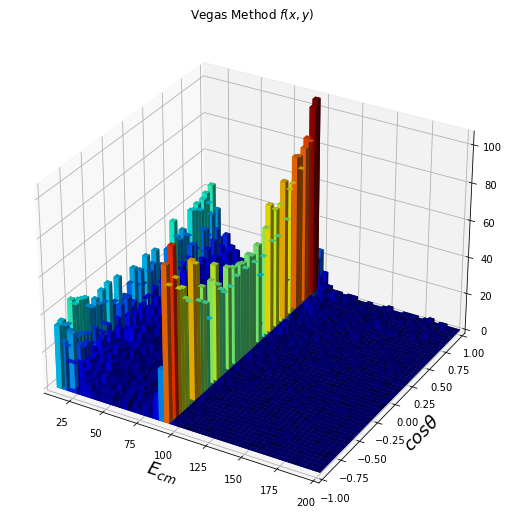

-----------------------------------
nPoints=10000, nIterations=10, nBins=50, alpha_damp=1.5
Vegas method nPoints=10000, nFunctionEval=59494, maxWeightEncountered=12394.09121756227, vegasRatioMax=15876.737928155206, vegasRatioFactor=6


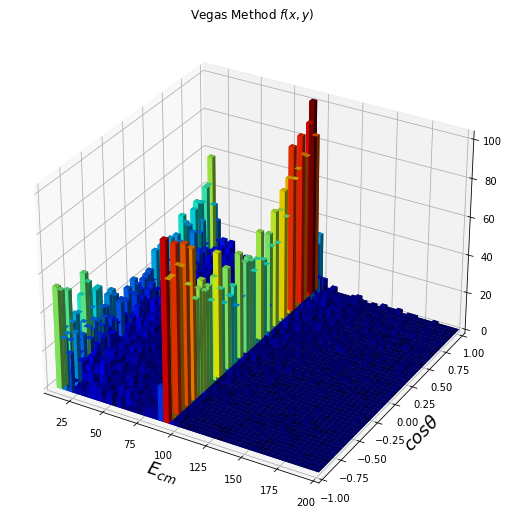

-----------------------------------
ratio=22478.82467098682 exceeds vegasRatioMax=15164.9543745509, yy=0.9902475236074436 program will now exit. Error number 1
ratio=23031.9556229761 exceeds vegasRatioMax=15164.9543745509, yy=0.9986404622979069 program will now exit. Error number 2
ratio=16754.474846447505 exceeds vegasRatioMax=15164.9543745509, yy=0.9881859561507235 program will now exit. Error number 3
nPoints=10000, nIterations=100, nBins=50, alpha_damp=1.5
Vegas method nPoints=10000, nFunctionEval=56598, maxWeightEncountered=23031.9556229761, vegasRatioMax=15164.9543745509, vegasRatioFactor=6


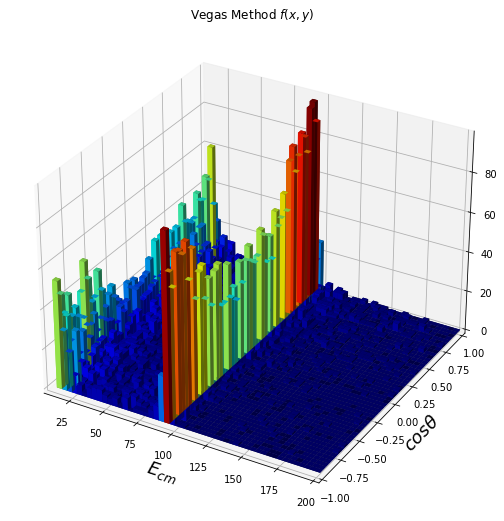

-----------------------------------
ratio=17455.54512994446 exceeds vegasRatioMax=15760.045585374528, yy=0.9915734509648422 program will now exit. Error number 1
ratio=17838.3682732025 exceeds vegasRatioMax=15760.045585374528, yy=0.9988253023487884 program will now exit. Error number 2
nPoints=10000, nIterations=4000, nBins=50, alpha_damp=1.5
Vegas method nPoints=10000, nFunctionEval=59156, maxWeightEncountered=17838.3682732025, vegasRatioMax=15760.045585374528, vegasRatioFactor=6


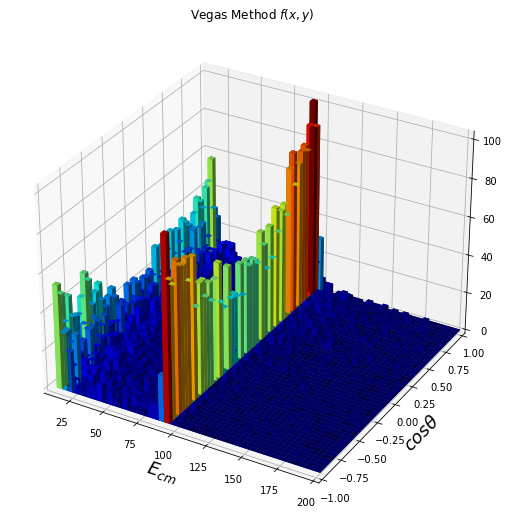

-----------------------------------


In [32]:
# Change nIterations

# Constants
nPoints = 10_000
nBins = 50
alpha_damp = 1.5

# Other parameters
vegasRatioFactor = 6
NN = 100  # range of NN values to iterate over
KK = 2000
nIterations = [0, 10, 100, 4000] # range of nIterations values to iterate over
seed = 42
method = 'SM'

# Loop only through NN list
for n in nIterations:
    vg = vegas(nPoints, vegasRatioFactor, NN, KK, n, alpha_damp, seed, method=method)
    print(f"nPoints={nPoints}, nIterations={n}, nBins={nBins}, alpha_damp={alpha_damp}")
    print(
        f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
    )
    plot_results3(vg, nBins=nBins)
    print('-----------------------------------')


nPoints=10000, nIterations=4000, nBins=100, alpha_damp=1.5
Vegas method nPoints=10000, nFunctionEval=59494, maxWeightEncountered=12394.09121756227, vegasRatioMax=15876.737928155206, vegasRatioFactor=6


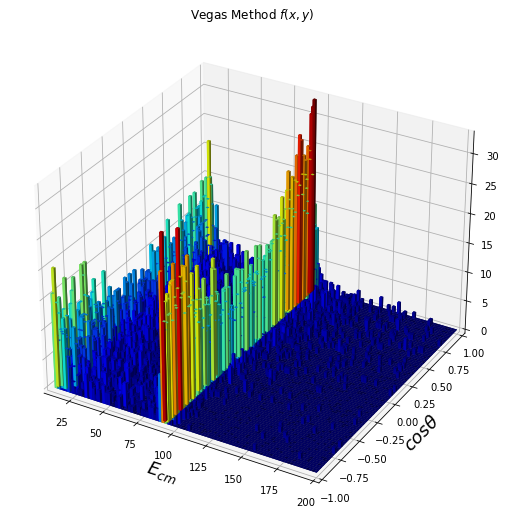

-----------------------------------


In [37]:
# Final Implementation

# Constants
nPoints = 10_000
nBins = 100
alpha_damp = 1.5

# Other parameters
vegasRatioFactor = 6
NN = 100  # range of NN values to iterate over
KK = 2000
nIterations = 10 # range of nIterations values to iterate over
seed = 42
method = 'SM'

# Loop only through NN list
vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed, method=method)
print(f"nPoints={nPoints}, nIterations={n}, nBins={nBins}, alpha_damp={alpha_damp}")
print(
    f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
)
plot_results3(vg, nBins=nBins)
print('-----------------------------------')

In [ ]:
s=np.linspace(XMIN,XMAX,1000)
E=np.linspace(10,200,1000)
s2=E**2

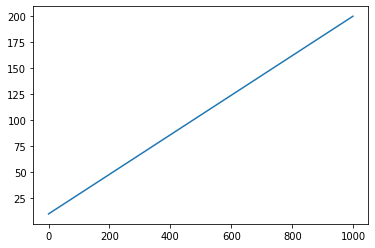

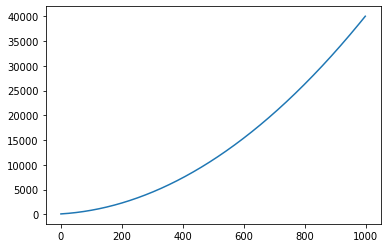

In [37]:
plt.plot(s)
plt.show()
plt.plot(s2)
plt.show()

# Replicate slides

In [54]:
def slides_plot(vg1,vg2):
    x_sm = np.array(vg1["yy1vegas"])
    y_sm = np.array(vg1["yy2vegas"])
    x_qed = np.array(vg2["yy1vegas"])
    y_qed = np.array(vg2["yy2vegas"])

    xhist_sm, xedges_sm = np.histogram(x_sm, bins=50)
    xpos_sm = (xedges_sm[:-1] + xedges_sm[1:]) / 2
    xhist_qed, xedges_qed = np.histogram(x_qed, bins=50)
    xpos_qed = (xedges_qed[:-1] + xedges_qed[1:]) / 2

    yhist_sm, yedges_sm = np.histogram(y_sm, bins=50)
    ypos_sm = (yedges_sm[:-1] + yedges_sm[1:]) / 2
    yhist_qed, yedges_qed = np.histogram(y_qed, bins=50)
    ypos_qed = (yedges_qed[:-1] + yedges_qed[1:]) / 2

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # axes[0].plot(xpos_sm, np.log10(xhist_sm), linewidth=2, color='g', label='SM')
    # y axis in log scale
    axes[0].plot(xpos_sm, xhist_sm, linewidth=2, color='g', label='SM')
    axes[0].plot(xpos_qed, xhist_qed, linewidth=2, color='r', label='QED')
    # the previous plot but with pink x marks
    axes[0].scatter(xpos_qed, xhist_sm, marker='x', color='pink', s=100, label='SM marks')
    # vertical line at x=Mz
    axes[0].axvline(x=Mz, color='k', linestyle='--', label='Z boson mass', linewidth=2)
    # set the y axis to log scale
    axes[0].set_yscale('log')

    axes[1].plot(ypos_sm, yhist_sm, linewidth=2, color='g', label='SM')
    axes[1].plot(ypos_qed, yhist_qed, linewidth=2, color='r', label='QED')

    axes[0].set_xlabel("$E_{cm}$", fontsize=18)
    axes[0].set_ylabel('$\sigma$ (pb)')
    axes[0].legend(fontsize=12)
    axes[1].set_xlabel("$cos$"+r"$\theta$", fontsize=18)
    axes[1].set_ylabel('$\sigma$ (pb)')
    axes[1].legend(fontsize=12)

    plt.tight_layout()
    plt.show()

In [40]:
nPoints=10_000
vegasRatioFactor=6
NN=100
KK=2000
nIterations=4000
alpha_damp=1.5
seed=42

vg_sm  = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method='SM')
vg_qed = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method='QED')

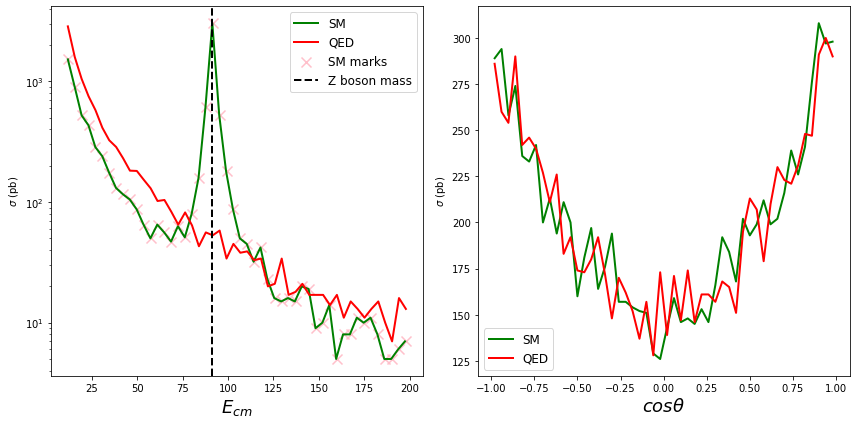

In [53]:
slides_plot(vg_sm,vg_qed)

In [ ]:
def sigma (E):
    return 4*np.pi*alpha**2/(3*E**2) * A0(E**2)